<a href="https://colab.research.google.com/github/baesunyoung6767/data-_analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1%EC%9B%94%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving 부산교통공사_시간대별 승하차인원_20220201.csv to 부산교통공사_시간대별 승하차인원_20220201 (1).csv


{'부산교통공사_시간대별 승하차인원_20220201.csv': b'\xbf\xaa\xb9\xf8\xc8\xa3,\xbf\xaa\xb8\xed,\xb3\xe2\xbf\xf9\xc0\xcf,\xbf\xe4\xc0\xcf,\xb1\xb8\xba\xd0,\xc7\xd5\xb0\xe8,01\xbd\xc3-02\xbd\xc3,02\xbd\xc3-03\xbd\xc3,03\xbd\xc3-04\xbd\xc3,04\xbd\xc3-05\xbd\xc3,05\xbd\xc3-06\xbd\xc3,06\xbd\xc3-07\xbd\xc3,07\xbd\xc3-08\xbd\xc3,08\xbd\xc3-09\xbd\xc3,09\xbd\xc3-10\xbd\xc3,10\xbd\xc3-11\xbd\xc3,11\xbd\xc3-12\xbd\xc3,12\xbd\xc3-13\xbd\xc3,13\xbd\xc3-14\xbd\xc3,14\xbd\xc3-15\xbd\xc3,15\xbd\xc3-16\xbd\xc3,16\xbd\xc3-17\xbd\xc3,17\xbd\xc3-18\xbd\xc3,18\xbd\xc3-19\xbd\xc3,19\xbd\xc3-20\xbd\xc3,20\xbd\xc3-21\xbd\xc3,21\xbd\xc3-22\xbd\xc3,22\xbd\xc3-23\xbd\xc3,23\xbd\xc3-24\xbd\xc3,24\xbd\xc3-01\xbd\xc3\r\n95,\xb4\xd9\xb4\xeb\xc6\xf7\xc7\xd8\xbc\xf6\xbf\xe5\xc0\xe5,2022-01-01,\xc5\xe4,\xbd\xc2\xc2\xf7,5142,0,0,0,10,30,46,724,850,310,217,227,219,271,364,371,390,449,249,150,108,105,39,10,3\r\n95,\xb4\xd9\xb4\xeb\xc6\xf7\xc7\xd8\xbc\xf6\xbf\xe5\xc0\xe5,2022-01-01,\xc5\xe4,\xc7\xcf\xc2\xf7,4430,0,0,0,1,36,601,997,67,67

In [ ]:
import io
import pandas as pd
data = pd.read_csv('부산교통공사_시간대별 승하차인원_20220201.csv', encoding='CP949') #csv 파일 읽어오기
data.head()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2022-01-01,토,승차,5142,0,0,0,10,...,371,390,449,249,150,108,105,39,10,3
1,95,다대포해수욕장,2022-01-01,토,하차,4430,0,0,0,1,...,320,329,283,161,124,83,117,82,36,18
2,95,다대포해수욕장,2022-01-02,일,승차,3429,0,0,0,7,...,412,441,344,182,96,109,66,23,6,0
3,95,다대포해수욕장,2022-01-02,일,하차,2992,0,0,0,0,...,304,255,191,158,120,76,104,80,37,14
4,95,다대포해수욕장,2022-01-03,월,승차,4323,0,0,0,19,...,410,335,371,209,110,75,71,33,4,0


In [ ]:
data['역명'] = data['역명'].str.strip() #역명 양쪽 공백 문자 제거
data['역명'] = data['역명'].str.replace(" ","") #역명 중간 공백 문자 제거

In [ ]:
data.columns = ['역번호','역명','년월일','요일','구분','합계','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시','24시']

In [ ]:
data['년월일'] = data['년월일'].astype('str')
data['년월일'] = pd.to_datetime(data['년월일'])
data['역번호'] = data['역번호'].astype('str')

In [ ]:
d_check = pd.DataFrame(data.groupby(['역번호','역명','구분'])['년월일'].count()) #년월일이 31 아닌 것 체크
d_check = d_check.reset_index() #인덱스 설정
d_check

,역번호,역명,구분,년월일
0,100,동매,승차,31
1,100,동매,하차,31
2,101,신평,승차,31
3,101,신평,하차,31
4,102,하단,승차,31
...,...,...,...,...
219,97,낫개,하차,31
220,98,신장림,승차,31
221,98,신장림,하차,31
222,99,장림,승차,31


In [ ]:
data

,역번호,역명,년월일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,95,다대포해수욕장,2022-01-01,토,승차,5142,0,0,0,10,...,371,390,449,249,150,108,105,39,10,3
1,95,다대포해수욕장,2022-01-01,토,하차,4430,0,0,0,1,...,320,329,283,161,124,83,117,82,36,18
2,95,다대포해수욕장,2022-01-02,일,승차,3429,0,0,0,7,...,412,441,344,182,96,109,66,23,6,0
3,95,다대포해수욕장,2022-01-02,일,하차,2992,0,0,0,0,...,304,255,191,158,120,76,104,80,37,14
4,95,다대포해수욕장,2022-01-03,월,승차,4323,0,0,0,19,...,410,335,371,209,110,75,71,33,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,414,안평,2022-01-29,토,하차,1467,0,0,0,0,...,110,111,118,93,59,45,66,49,34,13
6940,414,안평,2022-01-30,일,승차,1218,0,0,0,2,...,124,124,84,62,33,26,20,7,2,0
6941,414,안평,2022-01-30,일,하차,1204,0,0,0,0,...,100,91,89,75,59,53,68,47,18,12
6942,414,안평,2022-01-31,월,승차,1017,0,0,0,6,...,84,104,73,63,26,18,12,13,4,0


In [ ]:
data['년월일'] = data['년월일'].dt.day #2022년 1월 데이터 분석 -> 연도랑 월은 필요 없음
print(data)

      역번호       역명  년월일 요일  구분    합계  1시  2시  3시  4시  ...  15시  16시  17시  18시  \
0      95  다대포해수욕장    1  토  승차  5142   0   0   0  10  ...  371  390  449  249   
1      95  다대포해수욕장    1  토  하차  4430   0   0   0   1  ...  320  329  283  161   
2      95  다대포해수욕장    2  일  승차  3429   0   0   0   7  ...  412  441  344  182   
3      95  다대포해수욕장    2  일  하차  2992   0   0   0   0  ...  304  255  191  158   
4      95  다대포해수욕장    3  월  승차  4323   0   0   0  19  ...  410  335  371  209   
...   ...      ...  ... ..  ..   ...  ..  ..  ..  ..  ...  ...  ...  ...  ...   
6939  414       안평   29  토  하차  1467   0   0   0   0  ...  110  111  118   93   
6940  414       안평   30  일  승차  1218   0   0   0   2  ...  124  124   84   62   
6941  414       안평   30  일  하차  1204   0   0   0   0  ...  100   91   89   75   
6942  414       안평   31  월  승차  1017   0   0   0   6  ...   84  104   73   63   
6943  414       안평   31  월  하차  1013   0   0   0   1  ...   77   76   63   77   

      19시  20시  21시  22시  2

In [ ]:
data.head(10)

,역번호,역명,년월일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,95,다대포해수욕장,1,토,승차,5142,0,0,0,10,...,371,390,449,249,150,108,105,39,10,3
1,95,다대포해수욕장,1,토,하차,4430,0,0,0,1,...,320,329,283,161,124,83,117,82,36,18
2,95,다대포해수욕장,2,일,승차,3429,0,0,0,7,...,412,441,344,182,96,109,66,23,6,0
3,95,다대포해수욕장,2,일,하차,2992,0,0,0,0,...,304,255,191,158,120,76,104,80,37,14
4,95,다대포해수욕장,3,월,승차,4323,0,0,0,19,...,410,335,371,209,110,75,71,33,4,0
5,95,다대포해수욕장,3,월,하차,3322,0,0,1,0,...,289,246,250,323,229,122,127,82,36,14
6,95,다대포해수욕장,4,화,승차,4581,1,0,0,20,...,432,423,394,207,105,96,80,42,12,0
7,95,다대포해수욕장,4,화,하차,3741,2,0,0,0,...,296,272,292,334,219,125,137,116,48,22
8,95,다대포해수욕장,5,수,승차,4234,1,0,0,20,...,383,305,340,192,85,96,70,44,18,9
9,95,다대포해수욕장,5,수,하차,3200,0,0,0,3,...,245,224,229,305,233,116,148,103,44,38


In [ ]:
data.rename(columns={'년월일':'일'},inplace = True) #열 이름 변경
data

,역번호,역명,일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,95,다대포해수욕장,1,토,승차,5142,0,0,0,10,...,371,390,449,249,150,108,105,39,10,3
1,95,다대포해수욕장,1,토,하차,4430,0,0,0,1,...,320,329,283,161,124,83,117,82,36,18
2,95,다대포해수욕장,2,일,승차,3429,0,0,0,7,...,412,441,344,182,96,109,66,23,6,0
3,95,다대포해수욕장,2,일,하차,2992,0,0,0,0,...,304,255,191,158,120,76,104,80,37,14
4,95,다대포해수욕장,3,월,승차,4323,0,0,0,19,...,410,335,371,209,110,75,71,33,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,414,안평,29,토,하차,1467,0,0,0,0,...,110,111,118,93,59,45,66,49,34,13
6940,414,안평,30,일,승차,1218,0,0,0,2,...,124,124,84,62,33,26,20,7,2,0
6941,414,안평,30,일,하차,1204,0,0,0,0,...,100,91,89,75,59,53,68,47,18,12
6942,414,안평,31,월,승차,1017,0,0,0,6,...,84,104,73,63,26,18,12,13,4,0


In [ ]:
result = data[data['일'] <= 8] #1월 첫째주 데이터 추출
result = result[result['일'] >= 2]
result

,역번호,역명,일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
2,95,다대포해수욕장,2,일,승차,3429,0,0,0,7,...,412,441,344,182,96,109,66,23,6,0
3,95,다대포해수욕장,2,일,하차,2992,0,0,0,0,...,304,255,191,158,120,76,104,80,37,14
4,95,다대포해수욕장,3,월,승차,4323,0,0,0,19,...,410,335,371,209,110,75,71,33,4,0
5,95,다대포해수욕장,3,월,하차,3322,0,0,1,0,...,289,246,250,323,229,122,127,82,36,14
6,95,다대포해수욕장,4,화,승차,4581,1,0,0,20,...,432,423,394,207,105,96,80,42,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,414,안평,6,목,하차,1941,0,0,0,0,...,118,132,163,208,120,105,67,44,21,7
6894,414,안평,7,금,승차,1866,0,0,0,4,...,136,143,159,135,35,27,25,9,2,0
6895,414,안평,7,금,하차,1795,0,0,0,0,...,124,107,158,186,101,74,87,47,20,11
6896,414,안평,8,토,승차,1601,0,0,0,8,...,139,152,136,79,19,19,18,11,3,0


In [ ]:
result1 = data[data['일'] <= 15] #1월 둘째주 데이터 추출
result1 = result1[result1['일']>=9]
result1

,역번호,역명,일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
16,95,다대포해수욕장,9,일,승차,3465,0,0,0,9,...,415,415,327,221,100,84,73,18,5,0
17,95,다대포해수욕장,9,일,하차,3143,0,0,0,1,...,318,259,236,138,127,67,97,59,27,26
18,95,다대포해수욕장,10,월,승차,4520,0,0,0,19,...,394,362,349,189,91,89,76,46,13,0
19,95,다대포해수욕장,10,월,하차,3578,0,0,0,0,...,305,279,286,282,211,148,134,103,43,21
20,95,다대포해수욕장,11,화,승차,4136,0,0,0,18,...,291,279,302,176,99,96,79,29,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,414,안평,13,목,하차,1768,0,0,0,1,...,131,113,152,174,88,88,72,40,21,5
6908,414,안평,14,금,승차,1793,0,0,0,9,...,125,154,168,123,22,36,17,12,3,0
6909,414,안평,14,금,하차,1762,0,0,0,1,...,106,132,167,176,98,68,61,47,24,13
6910,414,안평,15,토,승차,1608,0,0,0,6,...,134,172,148,63,35,29,20,6,2,0


In [ ]:
result2 = data[data['일'] <= 22] #1월 셋째주 데이터 추출
result2 = result2[result2['일']>=16]
result2

,역번호,역명,일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
30,95,다대포해수욕장,16,일,승차,3641,0,0,0,6,...,540,409,333,174,101,112,74,42,9,0
31,95,다대포해수욕장,16,일,하차,3213,0,0,0,0,...,283,246,241,179,124,105,123,67,27,21
32,95,다대포해수욕장,17,월,승차,4186,0,0,0,23,...,362,316,343,214,77,90,70,30,4,0
33,95,다대포해수욕장,17,월,하차,3235,0,0,0,0,...,270,262,269,288,221,123,137,91,41,18
34,95,다대포해수욕장,18,화,승차,4218,0,1,0,19,...,322,299,323,248,90,99,84,35,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,414,안평,20,목,하차,1878,0,0,0,0,...,124,132,150,204,100,74,77,47,20,6
6922,414,안평,21,금,승차,1967,0,0,0,8,...,129,163,165,148,42,37,20,9,2,0
6923,414,안평,21,금,하차,1911,0,0,0,0,...,124,120,183,189,102,84,65,57,34,12
6924,414,안평,22,토,승차,1583,0,0,0,5,...,127,129,151,77,40,23,26,11,6,0


In [ ]:
result3 = data[data['일'] <= 29] #1월 셋째주 데이터 추출
result3 = result3[result3['일']>=23]
result3

,역번호,역명,일,요일,구분,합계,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
44,95,다대포해수욕장,23,일,승차,3289,0,0,0,11,...,437,342,269,167,117,75,69,38,6,0
45,95,다대포해수욕장,23,일,하차,2852,0,0,0,0,...,286,207,205,163,115,85,132,61,24,17
46,95,다대포해수욕장,24,월,승차,4206,1,0,0,27,...,313,282,297,182,95,93,79,46,7,1
47,95,다대포해수욕장,24,월,하차,3246,1,0,0,2,...,226,213,270,330,216,113,145,100,49,24
48,95,다대포해수욕장,25,화,승차,4355,1,0,1,15,...,364,275,298,228,99,114,86,41,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,414,안평,27,목,하차,1903,0,0,0,0,...,126,102,172,181,115,76,81,49,24,12
6936,414,안평,28,금,승차,1854,0,0,0,6,...,135,139,142,114,36,27,17,10,1,0
6937,414,안평,28,금,하차,1813,0,0,0,0,...,126,123,174,152,87,64,62,48,21,13
6938,414,안평,29,토,승차,1518,0,0,0,5,...,147,120,115,68,28,28,18,10,12,0


In [ ]:
df1 = result[['일','역번호','역명','구분','합계']]
df1.head()

,일,역번호,역명,구분,합계
2,2,95,다대포해수욕장,승차,3429
3,2,95,다대포해수욕장,하차,2992
4,3,95,다대포해수욕장,승차,4323
5,3,95,다대포해수욕장,하차,3322
6,4,95,다대포해수욕장,승차,4581


In [ ]:
df2 = result1[['일','역번호','역명','구분','합계']]
df2.head()

,일,역번호,역명,구분,합계
16,9,95,다대포해수욕장,승차,3465
17,9,95,다대포해수욕장,하차,3143
18,10,95,다대포해수욕장,승차,4520
19,10,95,다대포해수욕장,하차,3578
20,11,95,다대포해수욕장,승차,4136


In [ ]:
df3 = result2[['일','역번호','역명','구분','합계']]
df3.head()

,일,역번호,역명,구분,합계
30,16,95,다대포해수욕장,승차,3641
31,16,95,다대포해수욕장,하차,3213
32,17,95,다대포해수욕장,승차,4186
33,17,95,다대포해수욕장,하차,3235
34,18,95,다대포해수욕장,승차,4218


In [ ]:
df4 = result3[['일','역번호','역명','구분','합계']]
df4.head()

,일,역번호,역명,구분,합계
44,23,95,다대포해수욕장,승차,3289
45,23,95,다대포해수욕장,하차,2852
46,24,95,다대포해수욕장,승차,4206
47,24,95,다대포해수욕장,하차,3246
48,25,95,다대포해수욕장,승차,4355


In [ ]:
dfg_week1 = df1.groupby(['일','역번호','역명'])['합계'].mean() #1월 첫째주 각 역의 승하차 합계 평균
dfg_week1

일  역번호  역명     
2  100  동매         1664.0
   101  신평         3078.0
   102  하단         9079.0
   103  당리         3840.5
   104  사하         2097.0
                    ...  
8  95   다대포해수욕장    3962.0
   96   다대포항       2864.0
   97   낫개         3868.5
   98   신장림        2291.5
   99   장림         2397.0
Name: 합계, Length: 784, dtype: float64

In [ ]:
dfg_week2 = df2.groupby(['일','역번호','역명'])['합계'].mean() #1월 둘째주 각 역의 승하차 합계 평균
dfg_week2

일   역번호  역명     
9   100  동매         1734.5
    101  신평         3104.0
    102  하단         9368.5
    103  당리         3075.0
    104  사하         2100.5
                     ...  
15  95   다대포해수욕장    3770.0
    96   다대포항       2997.0
    97   낫개         3821.5
    98   신장림        2384.0
    99   장림         2357.0
Name: 합계, Length: 784, dtype: float64

In [ ]:
dfg_week3 = df3.groupby(['일','역번호','역명'])['합계'].mean() #1월 셋째주 각 역의 승하차 합계 평균
dfg_week3

일   역번호  역명     
16  100  동매         1731.5
    101  신평         3173.0
    102  하단         9394.0
    103  당리         3038.0
    104  사하         2139.5
                     ...  
22  95   다대포해수욕장    3899.0
    96   다대포항       3043.0
    97   낫개         3825.0
    98   신장림        2413.0
    99   장림         2482.5
Name: 합계, Length: 784, dtype: float64

In [ ]:
dfg_week4 = df4.groupby(['일','역번호','역명'])['합계'].mean() #1월 넷째주 각 역의 승하차 합계 평균
dfg_week4

일   역번호  역명     
23  100  동매         1735.5
    101  신평         3277.0
    102  하단         9507.5
    103  당리         2955.5
    104  사하         2163.0
                     ...  
29  95   다대포해수욕장    3262.5
    96   다대포항       2947.0
    97   낫개         3698.0
    98   신장림        2392.5
    99   장림         2127.0
Name: 합계, Length: 784, dtype: float64

In [ ]:
dfg2_week1 = pd.DataFrame(dfg_week1)
dfg2_week1 = dfg2_week1.reset_index()
dfg2_week1.head()

,일,역번호,역명,합계
0,2,100,동매,1664.0
1,2,101,신평,3078.0
2,2,102,하단,9079.0
3,2,103,당리,3840.5
4,2,104,사하,2097.0


In [ ]:
dfg2_week2 = pd.DataFrame(dfg_week2)
dfg2_week2 = dfg2_week2.reset_index()
dfg2_week2.head()

,일,역번호,역명,합계
0,9,100,동매,1734.5
1,9,101,신평,3104.0
2,9,102,하단,9368.5
3,9,103,당리,3075.0
4,9,104,사하,2100.5


In [ ]:
dfg2_week3 = pd.DataFrame(dfg_week3)
dfg2_week3 = dfg2_week3.reset_index()
dfg2_week3.head()

,일,역번호,역명,합계
0,16,100,동매,1731.5
1,16,101,신평,3173.0
2,16,102,하단,9394.0
3,16,103,당리,3038.0
4,16,104,사하,2139.5


In [ ]:
dfg2_week4 = pd.DataFrame(dfg_week4)
dfg2_week4 = dfg2_week4.reset_index()
dfg2_week4.head()

,일,역번호,역명,합계
0,23,100,동매,1735.5
1,23,101,신평,3277.0
2,23,102,하단,9507.5
3,23,103,당리,2955.5
4,23,104,사하,2163.0


In [ ]:
dfg2_week1.rename(columns={'합계':'이용객수'},inplace = True)
dfg2_week1

,일,역번호,역명,이용객수
0,2,100,동매,1664.0
1,2,101,신평,3078.0
2,2,102,하단,9079.0
3,2,103,당리,3840.5
4,2,104,사하,2097.0
...,...,...,...,...
779,8,95,다대포해수욕장,3962.0
780,8,96,다대포항,2864.0
781,8,97,낫개,3868.5
782,8,98,신장림,2291.5


In [ ]:
dfg2_week2.rename(columns={'합계':'이용객수'},inplace = True)
dfg2_week2

,일,역번호,역명,이용객수
0,9,100,동매,1734.5
1,9,101,신평,3104.0
2,9,102,하단,9368.5
3,9,103,당리,3075.0
4,9,104,사하,2100.5
...,...,...,...,...
779,15,95,다대포해수욕장,3770.0
780,15,96,다대포항,2997.0
781,15,97,낫개,3821.5
782,15,98,신장림,2384.0


In [ ]:
dfg2_week3.rename(columns={'합계':'이용객수'},inplace = True)
dfg2_week3

,일,역번호,역명,이용객수
0,16,100,동매,1731.5
1,16,101,신평,3173.0
2,16,102,하단,9394.0
3,16,103,당리,3038.0
4,16,104,사하,2139.5
...,...,...,...,...
779,22,95,다대포해수욕장,3899.0
780,22,96,다대포항,3043.0
781,22,97,낫개,3825.0
782,22,98,신장림,2413.0


In [ ]:
dfg2_week4.rename(columns={'합계':'이용객수'},inplace = True)
dfg2_week4

,일,역번호,역명,이용객수
0,23,100,동매,1735.5
1,23,101,신평,3277.0
2,23,102,하단,9507.5
3,23,103,당리,2955.5
4,23,104,사하,2163.0
...,...,...,...,...
779,29,95,다대포해수욕장,3262.5
780,29,96,다대포항,2947.0
781,29,97,낫개,3698.0
782,29,98,신장림,2392.5


In [ ]:
dfg3_week1 = pd.DataFrame(round(dfg2_week1.groupby(['역명'])['이용객수'].mean())) #1월 첫째주 각 역의 전체 이용객수 반올림해서 평균 추출
dfg3_week1

,이용객수
역명,
1동래,14817.0
1서면,31483.0
1연산,15635.0
2덕천,5320.0
2서면,21060.0
...,...
토성,6896.0
하단,14858.0
해운대,10310.0


In [ ]:
dfg3_week2 = pd.DataFrame(round(dfg2_week2.groupby(['역명'])['이용객수'].mean())) #1월 첫째주 각 역의 전체 이용객수 반올림해서 평균 추출
dfg3_week2

,이용객수
역명,
1동래,14668.0
1서면,32123.0
1연산,15878.0
2덕천,5117.0
2서면,21510.0
...,...
토성,6949.0
하단,14891.0
해운대,10532.0


In [ ]:
dfg3_week3 = pd.DataFrame(round(dfg2_week3.groupby(['역명'])['이용객수'].mean())) #1월 첫째주 각 역의 전체 이용객수 반올림해서 평균 추출
dfg3_week3

,이용객수
역명,
1동래,15236.0
1서면,32896.0
1연산,16423.0
2덕천,5319.0
2서면,22082.0
...,...
토성,7040.0
하단,15247.0
해운대,10855.0


In [ ]:
dfg3_week4 = pd.DataFrame(round(dfg2_week4.groupby(['역명'])['이용객수'].mean())) #1월 첫째주 각 역의 전체 이용객수 반올림해서 평균 추출
dfg3_week4

,이용객수
역명,
1동래,15118.0
1서면,32407.0
1연산,16264.0
2덕천,5542.0
2서면,21769.0
...,...
토성,6970.0
하단,15221.0
해운대,10419.0


In [ ]:
dfg3_week1 = dfg3_week1.sort_values(by = '이용객수', ascending=False) #오름차순 출력
dfg3_week1.head(10)

,이용객수
역명,
1서면,31483.0
2서면,21060.0
사상,17245.0
부산역,15893.0
1연산,15635.0
센텀시티,15378.0
자갈치,15258.0
남포,15178.0
부전,14901.0


In [ ]:
dfg3_week2 = dfg3_week2.sort_values(by = '이용객수', ascending=False) #오름차순 출력
dfg3_week2.head(10)

,이용객수
역명,
1서면,32123.0
2서면,21510.0
사상,17494.0
부산역,16480.0
1연산,15878.0
자갈치,15598.0
센텀시티,15234.0
부전,15042.0
남포,14935.0


In [ ]:
dfg3_week3 = dfg3_week3.sort_values(by = '이용객수', ascending=False) #오름차순 출력
dfg3_week3.head(10)

,이용객수
역명,
1서면,32896.0
2서면,22082.0
사상,17874.0
부산역,17016.0
자갈치,16426.0
1연산,16423.0
부전,15745.0
센텀시티,15693.0
남포,15382.0


In [ ]:
dfg3_week4 = dfg3_week4.sort_values(by = '이용객수', ascending=False) #오름차순 출력
dfg3_week4.head(10)

,이용객수
역명,
1서면,32407.0
2서면,21769.0
사상,18106.0
부전,16855.0
부산역,16324.0
자갈치,16288.0
1연산,16264.0
센텀시티,15545.0
하단,15221.0


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf #실행 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

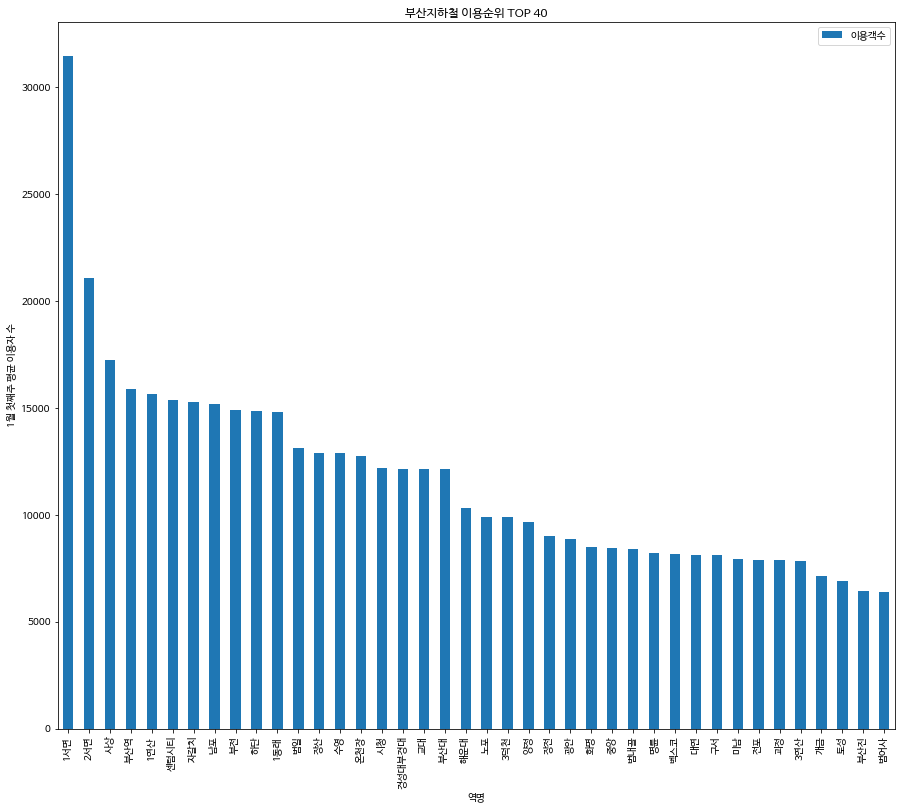

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

dfg4 = dfg3_week1.head(40)
dfg4.plot(kind='bar',figsize=(15,13))
plt.title("부산지하철 이용순위 TOP 40")
plt.xlabel("역명")
plt.ylabel("1월 첫째주 평균 이용자 수")
plt.show()

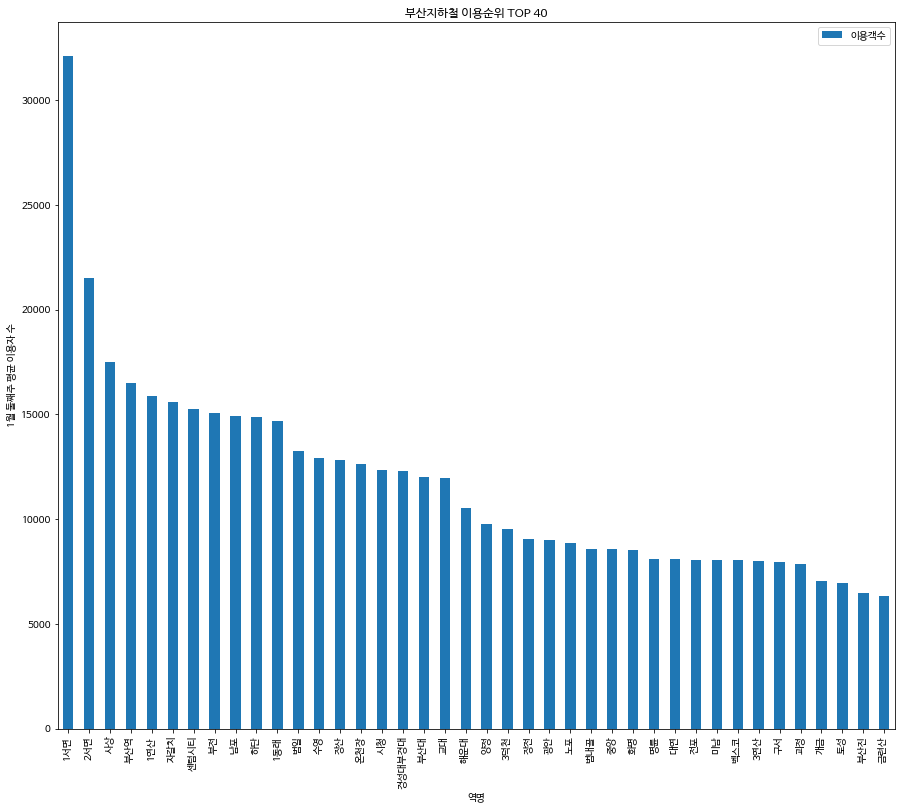

In [ ]:
dfg4_week2 = dfg3_week2.head(40)
dfg4_week2.plot(kind='bar',figsize=(15,13))
plt.title("부산지하철 이용순위 TOP 40")
plt.xlabel("역명")
plt.ylabel("1월 둘째주 평균 이용자 수")
plt.show()

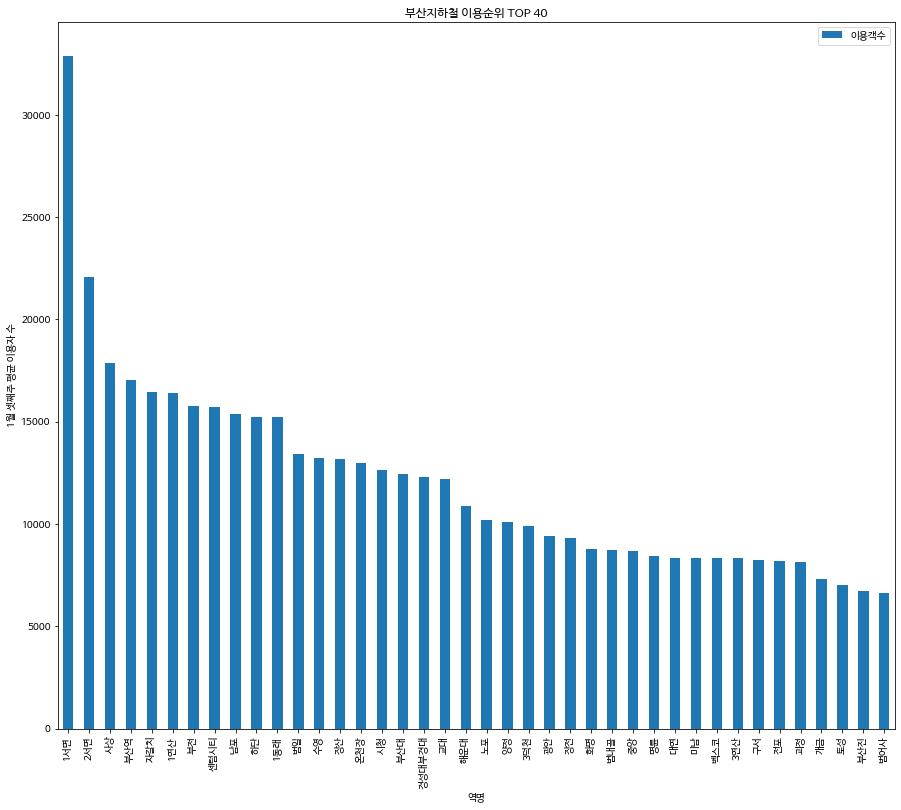

In [ ]:
dfg4_week3 = dfg3_week3.head(40)
dfg4_week3.plot(kind='bar',figsize=(15,13))
plt.title("부산지하철 이용순위 TOP 40")
plt.xlabel("역명")
plt.ylabel("1월 셋째주 평균 이용자 수")
plt.show()

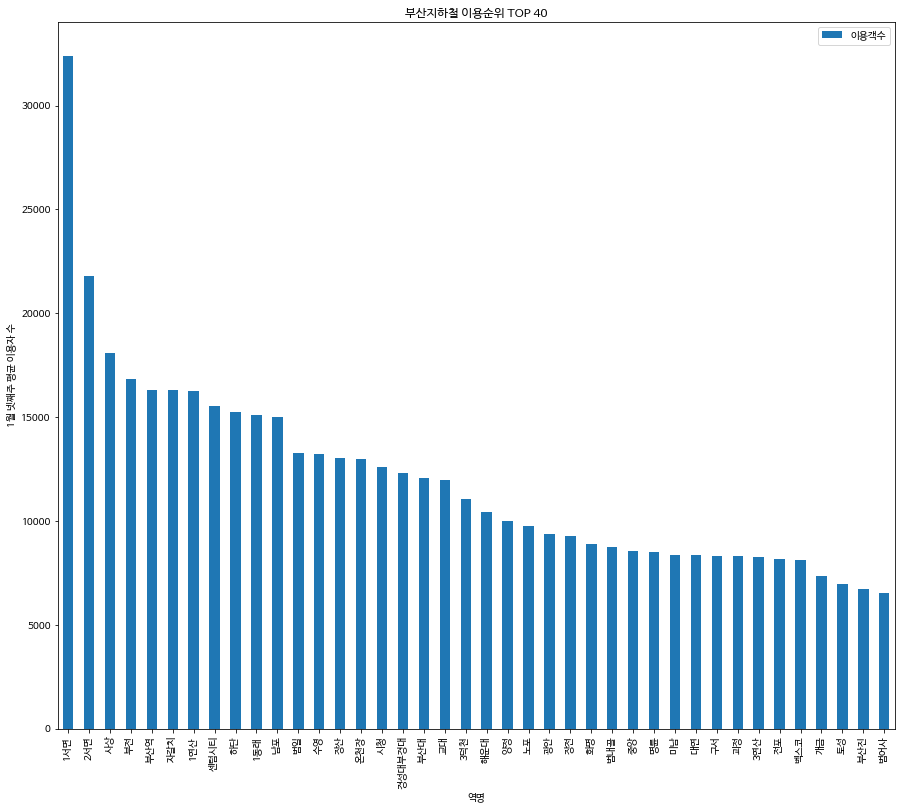

In [ ]:
dfg4_week4 = dfg3_week4.head(40)
dfg4_week4.plot(kind='bar',figsize=(15,13))
plt.title("부산지하철 이용순위 TOP 40")
plt.xlabel("역명")
plt.ylabel("1월 넷째주 평균 이용자 수")
plt.show()

In [ ]:
#tmp_week2 = dfg3.sort_index() #오름차순 출력
#tmp_week2
tmp_week1 = pd.DataFrame(round(dfg2_week1.groupby(['역명'])['이용객수'].mean()))
tmp_week2 = pd.DataFrame(round(dfg2_week2.groupby(['역명'])['이용객수'].mean()))
tmp_week3 = pd.DataFrame(round(dfg2_week3.groupby(['역명'])['이용객수'].mean()))
tmp_week4 = pd.DataFrame(round(dfg2_week4.groupby(['역명'])['이용객수'].mean()))

df_list = [tmp_week1,tmp_week2,tmp_week3,tmp_week4]
df_all = pd.concat(df_list, axis = 1)
df_all.columns = ['첫째주','둘째주','셋째주','넷째주']
df_all

,첫째주,둘째주,셋째주,넷째주
역명,,,,
1동래,14817.0,14668.0,15236.0,15118.0
1서면,31483.0,32123.0,32896.0,32407.0
1연산,15635.0,15878.0,16423.0,16264.0
2덕천,5320.0,5117.0,5319.0,5542.0
2서면,21060.0,21510.0,22082.0,21769.0
...,...,...,...,...
토성,6896.0,6949.0,7040.0,6970.0
하단,14858.0,14891.0,15247.0,15221.0
해운대,10310.0,10532.0,10855.0,10419.0


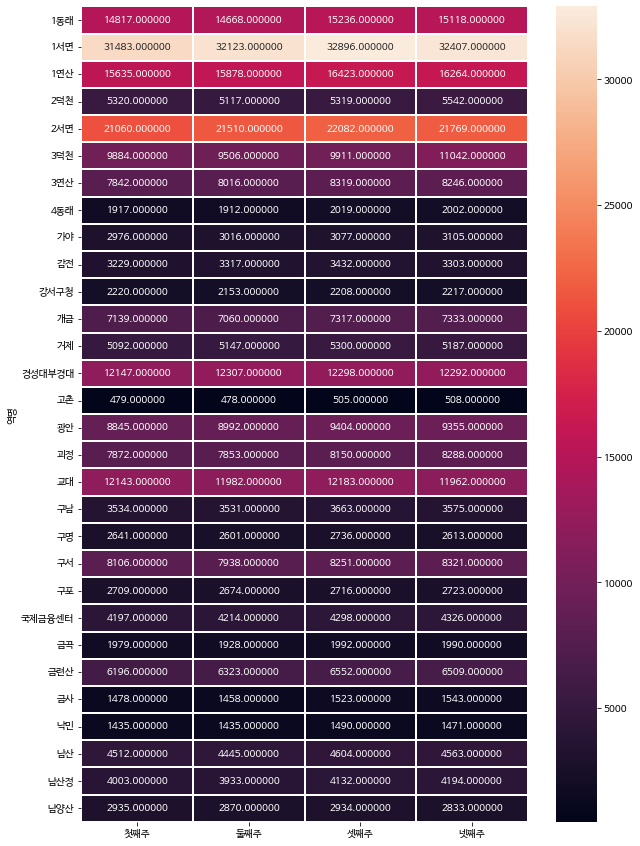

In [ ]:
#1월 주차별 역번호 순으로 40개역 이용객 수 데이터 비교
import seaborn as sns
plt.figure(figsize=(10,15))
sns.heatmap(data = df_all.head(30), annot = True, fmt = '2f',linewidths=1) 